# Put a title here

Will come back to refine this introduction but in short, will be working with Hacker News posts. The dataset I'll be working is 20,000 rows long. We'll be going through the dataset to analyze two things.

    1) Does the post type of `Ask HN` or `Show HN` get more comments on average?
    2) Do posts created at certain times garner more attention?

In [50]:
import pandas as pd
hn = pd.read_csv('hacker_news.csv')
hn.head()

,id,title,url,num_points,num_comments,author,created_at
0,12224879,Interactive Dynamic Video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
1,10975351,How to Use Open Source and Shut the Fuck Up at...,http://hueniverse.com/2016/01/26/how-to-use-op...,39,10,josep2,1/26/2016 19:30
2,11964716,Florida DJs May Face Felony for April Fools' W...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20
3,11919867,Technology ventures: From Idea to Enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,6/17/2016 0:01
4,10301696,Note by Note: The Making of Steinway L1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,9/30/2015 4:12


In [51]:
len(hn)

20100

In [52]:
hn['title'] = hn['title'].str.lower()

In [106]:
hn.head()

,id,title,url,num_points,num_comments,author,created_at
0,12224879,interactive dynamic video,http://www.interactivedynamicvideo.com/,386,52,ne0phyte,8/4/2016 11:52
1,10975351,how to use open source and shut the fuck up at...,http://hueniverse.com/2016/01/26/how-to-use-op...,39,10,josep2,1/26/2016 19:30
2,11964716,florida djs may face felony for april fools' w...,http://www.thewire.com/entertainment/2013/04/f...,2,1,vezycash,6/23/2016 22:20
3,11919867,technology ventures: from idea to enterprise,https://www.amazon.com/Technology-Ventures-Ent...,3,1,hswarna,6/17/2016 0:01
4,10301696,note by note: the making of steinway l1037 (2007),http://www.nytimes.com/2007/11/07/movies/07ste...,8,2,walterbell,9/30/2015 4:12


In [53]:
ask_bool_map = hn[hn['title'].str.startswith('ask hn')]
ask_hn_rows = ask_bool_map[['id','title','url','num_points','num_comments','author','created_at']]

show_bool_map = hn[hn['title'].str.startswith('show hn')]
show_hn_rows = show_bool_map[['id','title','url','num_points','num_comments','author','created_at']]

In [74]:
# trying to extract the non-ask or non-show posts. it's too weird tho.

non_ask_df = hn[~hn['title'].str.contains('ask hn')]
non_show_df = hn[~hn['title'].str.contains('show hn')]

both_non_ask_non_show = non_ask_df + non_show_df

In [82]:
len(show_hn_rows), len(ask_hn_rows)

(1162, 1744)

In [76]:
len(both_non_ask_non_show)

20095

In [81]:
ask_list = []
show_list = []
no_prefix_list = []
for i in hn['title']:
    if i.startswith('ask hn'):
        ask_list.append(i)
    elif i.startswith('show hn'):
        show_list.append(i)
    else:
        no_prefix_list.append(i)

In [84]:
[len(ask_list),len(show_list), len(no_prefix_list)]

[1744, 1162, 17194]

In [86]:
hn['num_comments'].sum()

498526

In [90]:
from matplotlib import pyplot as plt
%matplotlib inline

In [102]:
comment_sums = [show_hn_rows['num_comments'].sum(),ask_hn_rows['num_comments'].sum()]
x_labels = ['show hn comment total', 'ask hn comment total']

In [105]:
print('The ' + str(x_labels[0]) + ' is ' + str(comment_sums[0]))
print('The ' + str(x_labels[1]) + ' is ' + str(comment_sums[1]))

The show hn comment total is 11988
The ask hn comment total is 24483


<BarContainer object of 2 artists>

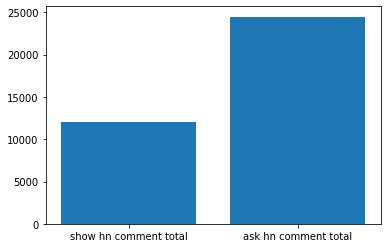

In [101]:
plt.bar(x_labels,comment_sums)

In [107]:
hn['created_at'].head()

0     8/4/2016 11:52
1    1/26/2016 19:30
2    6/23/2016 22:20
3     6/17/2016 0:01
4     9/30/2015 4:12
Name: created_at, dtype: object

In [120]:
import datetime

In [123]:
datetime.datetime.strptime(hn['created_at'][4], '%m/%d/%Y %H:%M') > datetime.datetime.strptime(hn['created_at'][1], '%m/%d/%Y %H:%M')

False

In [124]:
for i in hn['created_at']:
    datetime.datetime.strptime(i,'%m/%d/%Y %H:%M')

In [126]:
datetime.datetime.strptime(hn['created_at'], '%m/%d/%Y %H:%M')

TypeError: strptime() argument 1 must be str, not Series

In [131]:
time_and_points = pd.DataFrame([hn['created_at'],hn['num_points']])
time_and_comments = pd.DataFrame([hn['created_at'],hn['num_comments']])

In [132]:
time_and_comments.head()

,0,1,2,3,4,5,6,7,8,9,...,20090,20091,20092,20093,20094,20095,20096,20097,20098,20099
created_at,8/4/2016 11:52,1/26/2016 19:30,6/23/2016 22:20,6/17/2016 0:01,9/30/2015 4:12,10/31/2015 9:48,11/13/2015 0:45,8/16/2016 9:55,3/22/2016 16:18,10/13/2015 9:30,...,4/5/2016 19:31,11/18/2015 15:45,6/9/2016 16:49,10/17/2015 16:35,11/7/2015 11:27,8/29/2016 2:22,10/6/2015 14:57,1/2/2016 0:49,12/15/2015 19:32,5/12/2016 1:43
num_comments,52,10,1,1,2,22,4,6,7,10,...,2,41,1,70,2,6,1,132,222,58


In [158]:
def cut_date(col_item):
    col_item = col_item.split(' ')
    col_item = col_item[1]
    col_item = col_item.split(':')
    col_item = col_item[0]
    return col_item

In [148]:
cut_date(time_and_comments[1][0])

'19'

In [167]:
hour_bucket = {'0':0,
               '1':0,
               '2':0,
               '3':0, 
               '4':0, 
               '5':0,
               '6':0,
               '7':0,
               '8':0,
               '9':0,
               '10':0,
               '11':0,
               '12':0,
               '13':0,
               '14':0,
               '15':0,
               '16':0,
               '17':0,
               '18':0,
               '19':0,
               '20':0,
               '21':0,
               '22':0,
               '23':0,
              }

In [168]:
for i in time_and_comments:
    cdate = cut_date(time_and_comments[i][0])
    hour_bucket[cdate] += 1

In [165]:
a = {'4':0,'04':0}

for i in time_and_comments:
    if cut_date(time_and_comments[i][0]) == '3':
        a['3'] += 1
    elif cut_date(time_and_comments[i][0]) == '03':
        a['03'] += 1

In [166]:
a

{'3': 488, '03': 0}

In [146]:
b = {'i':0}
for i in 'mississipi':
    if i == 'i':
        b['i'] += 1

In [147]:
b

{'i': 4}

In [169]:
hour_bucket

{'0': 697,
 '1': 588,
 '2': 529,
 '3': 488,
 '4': 527,
 '5': 453,
 '6': 468,
 '7': 508,
 '8': 578,
 '9': 609,
 '10': 686,
 '11': 762,
 '12': 923,
 '13': 1102,
 '14': 1151,
 '15': 1234,
 '16': 1302,
 '17': 1362,
 '18': 1254,
 '19': 1145,
 '20': 1051,
 '21': 1030,
 '22': 875,
 '23': 778}

<BarContainer object of 24 artists>

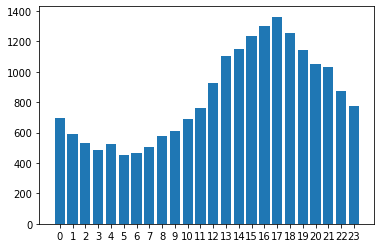

In [170]:
plt.bar(hour_bucket.keys(),hour_bucket.values())

In [177]:
comment_hour_bucket = {'0':0,
               '1':0,
               '2':0,
               '3':0, 
               '4':0, 
               '5':0,
               '6':0,
               '7':0,
               '8':0,
               '9':0,
               '10':0,
               '11':0,
               '12':0,
               '13':0,
               '14':0,
               '15':0,
               '16':0,
               '17':0,
               '18':0,
               '19':0,
               '20':0,
               '21':0,
               '22':0,
               '23':0,
              }


for i in time_and_comments:
    temp_v = cut_date(time_and_comments[i][0])
    comment_hour_bucket[temp_v] += time_and_comments[i][1]
    
comment_hour_bucket

{'0': 17478,
 '1': 12465,
 '2': 13762,
 '3': 11626,
 '4': 11537,
 '5': 10290,
 '6': 9253,
 '7': 12576,
 '8': 14062,
 '9': 15274,
 '10': 16818,
 '11': 20664,
 '12': 25351,
 '13': 30562,
 '14': 33545,
 '15': 35809,
 '16': 30857,
 '17': 34784,
 '18': 31587,
 '19': 27894,
 '20': 23414,
 '21': 22652,
 '22': 18684,
 '23': 17582}

In [181]:
hn['num_comments'].sum()

498526

In [182]:
c = 0
for i in comment_hour_bucket:
    c += comment_hour_bucket[i]
    
c

498526

<BarContainer object of 24 artists>

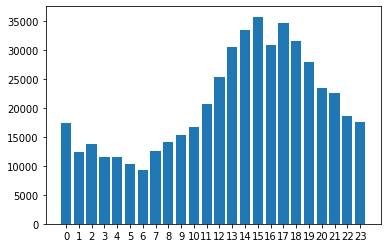

In [183]:
plt.bar(comment_hour_bucket.keys(),comment_hour_bucket.values())